In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from data import read_data
from utils import data_preprocess,generate_features
from sklearn.preprocessing import StandardScaler,MinMaxScaler

df = read_data()
scaler = StandardScaler()
sca_x = scaler.fit_transform(df.iloc[:, :-1])

x,y = generate_features(df,sca_x,max_len=20,pre_days = 10)
total_num = len(x)
train_num = int(total_num*0.7)
val_num = int(total_num*0.8)
x_train, y_train = x[:train_num], y[:train_num]
x_val, y_val = x[train_num:val_num], y[train_num:val_num]
x_test, y_test = x[val_num:], y[val_num:]
batch_size = 64
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.batch(batch_size).shuffle(10000)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = val_ds.batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(batch_size)

sample = next(iter(train_ds))
print('x_train.shape:', sample[0].shape)
print('y_train.shape:', sample[1].shape)

2739
x_train.shape: (61, 20, 5)
y_train.shape: (61,)


In [2]:
from network import LSTMModel,GRUModel
model = LSTMModel()
model.compile(optimizer = keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = tf.keras.losses.MSE)

epochs = 500
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Epoch 1/500
30/30 [==============================] - 2s 21ms/step - loss: 34.9954 - mean_squared_error: 1409.1855 - val_loss: 90.5399 - val_mean_squared_error: 8281.1807
Epoch 2/500
30/30 [==============================] - 0s 10ms/step - loss: 34.2256 - mean_squared_error: 1369.9843 - val_loss: 89.6928 - val_mean_squared_error: 8136.0312

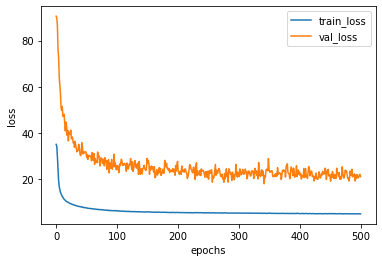

In [3]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_mse = history_dict['mean_squared_error']
val_mse = history_dict['mean_squared_error']

for i in range(len(train_loss)):
    train_loss[i] = train_loss[i]
    val_loss[i] = val_loss[i]

plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
model.evaluate(test_ds)
y_pred = model.predict(x_test)
print('mse:{}'.format(mean_squared_error(y_pred,y_test)))

mse:1.7562
